<a href="https://colab.research.google.com/github/madelvallez/Cours/blob/master/NSI/Chap11/ACTIVITE_Diviser_R%C3%A9gner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rechercher une valeur dans une liste

## Exemple 1

Exécuter "à la main" le programme suivant, puis vérifier avec Python

In [ ]:
def est_present(t, e) :
    bingo = False
    i = 0
    n = len(t)
    while (i < n) and (bingo == False) :
        if t[i] == e :
            bingo = True
        i = i + 1
    return bingo
    
print(est_present([3,5,12,15,48],4))    #False
print(est_present([3,5,12,15,48],3))    #True

False
True


#### Quelle est la complexité en temps de la fonction `est_present`:
* dans le meilleur des cas ? -> 1
* dans le pire des cas ? -> longueur de t

=> Idée principale: Plus le tableau est grand plus l'execution est longue dans le cas où `e` n'est pas dans la tableau. 

=> La complexité est proportionnelle à la taille du tableau. On dit qu'elle est **linéaire** et on note $O(n)$.

## Exemple 2

In [ ]:
def mystere(t, e):
    bingo = False
    indiceGauche = 0
    indiceDroite = len(t) - 1
    while (indiceGauche <= indiceDroite) and (bingo == False) :
        indiceMedian = (indiceGauche + indiceDroite) // 2
        if t[indiceMedian] == e:
                bingo = True
        elif t[indiceMedian] < e:
                indiceGauche = indiceMedian + 1
        else:
                indiceDroite =indiceMedian - 1
    return bingo


print(mystere([2, 12, 17, 25, 33, 35, 44, 54, 77, 91], 35))
print(mystere([2, 12, 17, 25, 33, 35, 44, 54, 77, 91], 50))

1. A quelle précondition sur le tableau t la fonction mystère permet-elle de détecter la présence d'un élément e dans t ? *-> Le tableau `t` doit être ordonné dans l'ordre croissant.*
2. Dans quel cas l'exécution de `mystere(t, e)` est-elle la plus longue possible ? *-> L'execition est la plus longue quand `e` n'est pas dans `t`*

## Complexité de la fonction mystère

In [ ]:
def nb_boucles_mystere(t, e):
    cpt = 0
    bingo = False
    indiceGauche = 0
    indiceDroite = len(t) - 1
    while (indiceGauche <= indiceDroite) and (bingo == False) :
        cpt += 1
        indiceMedian = (indiceGauche + indiceDroite) // 2
        if t[indiceMedian] == e:
                bingo = True
        elif t[indiceMedian] < e:
                indiceGauche = indiceMedian + 1
        else:
                indiceDroite =indiceMedian - 1
    return cpt


print(nb_boucles_mystere([0 for i in range(32)],1)) #2^5
print(nb_boucles_mystere([0 for i in range(128)],1)) #2^7

6
8


1. Exécuter la fonction `nb_boucles_mystere` sur des tableaux de taille 32, 64, 128... $2^k$ pour différentes valeur de cas afin d'évaluer le nombre de boucles exécutées **dans le pire des cas**
2. Que peut-on en conclure sur la complexité en temps de la fonction mystère. *->La complexité est logarithmique d'ordre 2*

## Représentation graphique

Entrer n :5


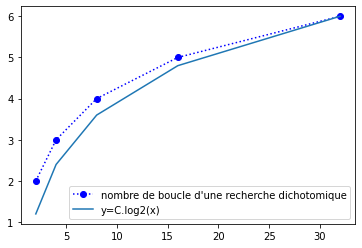

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Recherche sur des tableaux de taille 2^k 
n = int(input('Entrer n :'))
abs = []
ord = []
for k in range(1,n+1):
    taille = 2**k
    tab = [0 for i in range(taille)]
    abs.append(taille)
    ord.append(nb_boucles_mystere(tab,1))

# graphique
plt.plot(np.array(abs), np.array(ord),  "b:o",label="nombre de boucle d'une recherche dichotomique")

# fonction logarithme (k.x^2)
from math import log2

ord = []
c = 1.2
for k in range(1,n+1):
    taille = 2**k
    ord.append(c* log2(taille))
plt.plot(np.array(abs), np.array(ord),label="y=C.log2(x)")
plt.legend()
plt.show() # affiche la figure a l'ecran

## Rappel 

![](https://codimd.s3.shivering-isles.com/demo/uploads/upload_fafe470b6fda17b1b8bc77f58fc6408f.png)


**Propriétés :** 

* si $n = 2^k$  alors $ log_2(n) = k$
* autrement dit :  $log_2(2^k) = k$
* pour tout entier n, $log_2(n)$ est **environ** égal au nombre de chiffres nécessaires pour écrire n en binaire. 

Sur 8 bits, on peut écrire $(11111111)_2 = 255$ 

donc 

$log_2(255) \approx 8$


In [ ]:
from math import log2
log2(255)

7.994353436858858

In [ ]:
log2(256)

8.0